In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


Data Collection and Processing

In [2]:
titanic = pd.read_csv('data/Train.csv')


In [3]:
#first 5 rows of the dataset
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#number of rows and columns
titanic.shape

(891, 12)

In [5]:
#data types of columns
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
#checking for missing values
titanic.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Handling missing Data

In [7]:
#find mean age
mean_age = titanic['Age'].mean()

In [8]:
#filling missing values
titanic['Age'] = titanic['Age'].fillna(mean_age)

In [9]:
#dropping the Cabin column
titanic = titanic.drop(['Cabin'], axis=1)

In [10]:
#finding the mode of the Embarked column
titanic['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [11]:
#filling the missing values in the Embarked column
titanic['Embarked'] = titanic['Embarked'].fillna('S')

In [12]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Data Analysis

In [13]:
#getting some statistics of the dataset
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
#finding the number of people who survived and who did not
titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Data Visualization

In [15]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

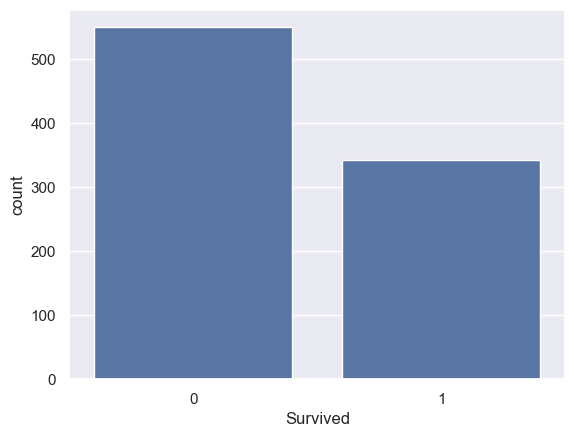

In [16]:
#visualizing the number of people who survived and who did not
sns.countplot(x='Survived', data=titanic)


In [17]:
titanic['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

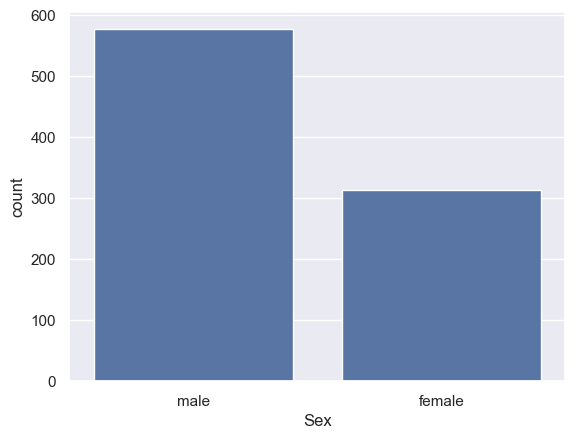

In [18]:
#visualizing the number of people 
sns.countplot(x='Sex', data=titanic)

<Axes: xlabel='Sex', ylabel='count'>

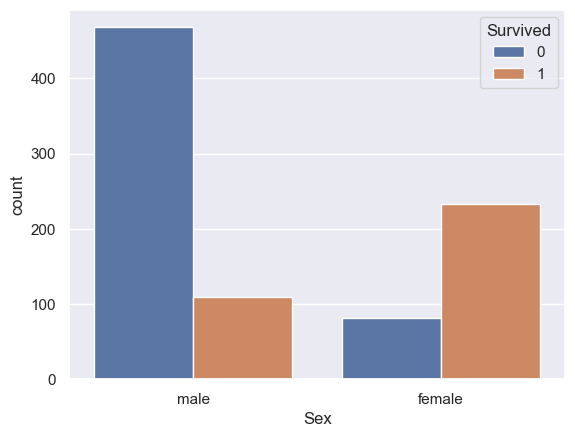

In [19]:
sns.countplot(x='Sex', hue='Survived', data=titanic)

<Axes: xlabel='Pclass', ylabel='count'>

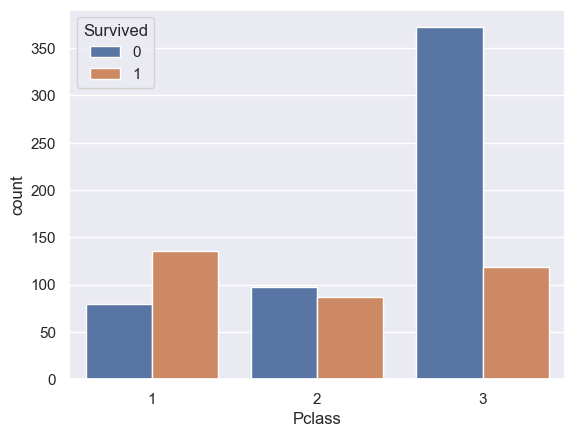

In [20]:
#visualizing the number of people who survived and who did not based on the Pclass
sns.countplot(x='Pclass', hue='Survived', data=titanic)

<Axes: xlabel='Embarked', ylabel='count'>

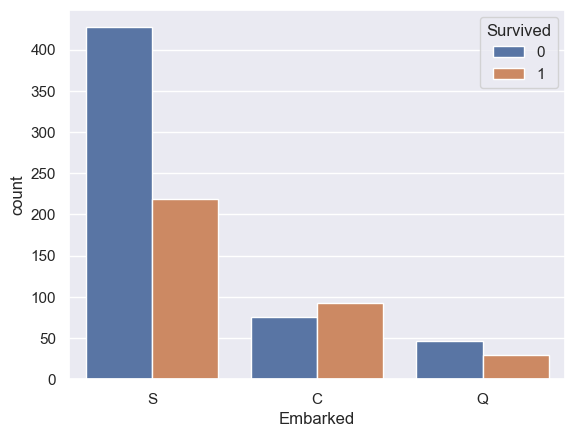

In [21]:
#visualizing the number of people who survived and who did not based on the Embarked
sns.countplot(x='Embarked', hue='Survived', data=titanic)

C:\Users\Asus\AppData\Local\Temp\ipykernel_6156\2905237330.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['Age'])


<Axes: xlabel='Age', ylabel='Density'>

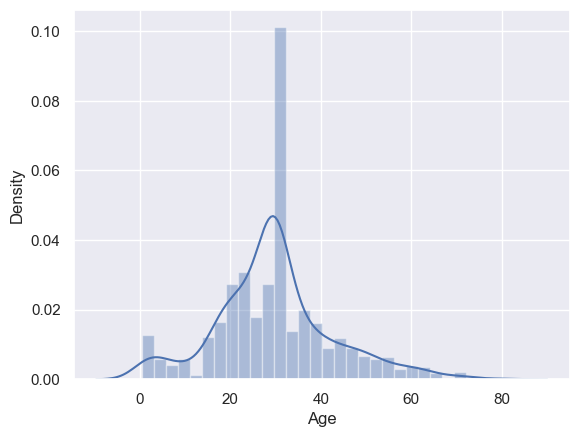

In [22]:
#visualizing the distribution of the Age column
sns.distplot(titanic['Age'])

C:\Users\Asus\AppData\Local\Temp\ipykernel_6156\4182057076.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

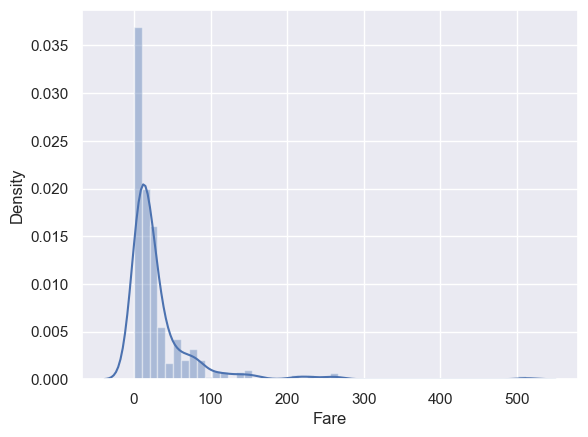

In [23]:
#visualizing the distribution of the Fare column
sns.distplot(titanic['Fare'])


Encoding Categorical Data


In [24]:
titanic['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [25]:
titanic['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [30]:
titanic.replace({'Sex':{'male':0, 'female': 1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_6156\926639627.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic.replace({'Sex':{'male':0, 'female': 1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)


In [31]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


Separating the data into features and labels

In [34]:
X = titanic.drop(columns=['PassengerId','Name','Ticket','Survived'], axis=1)
Y = titanic['Survived']

In [35]:
print(X)
print(Y)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


Train   Test Split

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

Model Building
Logistic Regression

In [37]:
model = LogisticRegression()

In [38]:
model.fit(X_train, Y_train)

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

In [39]:
X_train_prediction = model.predict(X_train)
accuracy_train_data = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on train data : ', accuracy_train_data)

Accuracy on train data :  0.8075842696629213


In [40]:
X_test_prediction = model.predict(X_test)
accuracy_test_data = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on test data : ', accuracy_test_data)

Accuracy on test data :  0.7821229050279329
